# 149900 Individual Task Analysis

Link to project: [Machine-Learning-Task](https://github.com/Arnold-18-CS/Machine-Learning-Task)

Importing necessary libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Loading the data, and performing exploration

In [181]:
df = pd.read_csv("Nairobi Office Price Ex.csv")
df.head()

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOC        14 non-null     object 
 1   FUR        14 non-null     object 
 2   AMB        14 non-null     object 
 3   PROX_SCH   14 non-null     object 
 4   PROX_ROAD  14 non-null     object 
 5   PROX_MALL  14 non-null     object 
 6   WATER      14 non-null     object 
 7   HK_SER     14 non-null     object 
 8   SIZE       14 non-null     float64
 9   PRICE      14 non-null     float64
dtypes: float64(2), object(8)
memory usage: 1.2+ KB


Checking for missing values

In [183]:
df.isnull().sum()

LOC          0
FUR          0
AMB          0
PROX_SCH     0
PROX_ROAD    0
PROX_MALL    0
WATER        0
HK_SER       0
SIZE         0
PRICE        0
dtype: int64

Extracting target and feature

In [184]:
x = df['SIZE'].values
y = df['PRICE'].values
print(x,y)

[32.50234527 53.42680403 61.53035803 47.47563963 59.81320787 55.14218841
 52.21179669 39.29956669 48.10504169 52.55001444 45.41973014 54.35163488
 44.1640495  58.16847072] [31.70700585 68.77759598 62.5623823  71.54663223 87.23092513 78.21151827
 79.64197305 59.17148932 75.3312423  71.30087989 55.16567715 82.47884676
 62.00892325 75.39287043]


In [185]:
print(len(x), len(y))

14 14


Checking distribution

<Axes: ylabel='Frequency'>

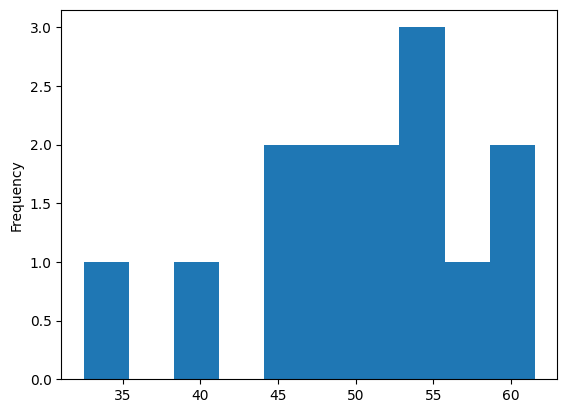

In [186]:
df.SIZE.plot(kind="hist")

<Axes: ylabel='Frequency'>

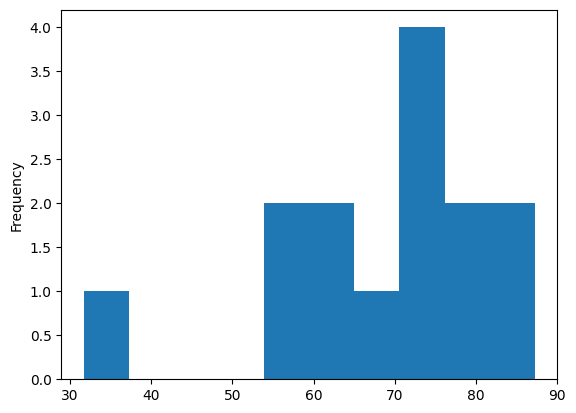

In [187]:
df.PRICE.plot(kind="hist")


Data Normalization

In [188]:
x = (x - x.min())/ (x.max() - x.min())
y = (y - y.min())/ (y.max() - y.min()) 

print(x, y)

[0.         0.72083676 1.         0.51582223 0.94084507 0.77993087
 0.67898039 0.23416076 0.53750481 0.69063182 0.44499722 0.75269671
 0.40173967 0.88418472] [0.         0.66765082 0.55571323 0.71752187 1.         0.83755817
 0.86332103 0.49464238 0.78568367 0.71309581 0.42249668 0.91441385
 0.54574529 0.7867936 ]


Mean Squared Error Function

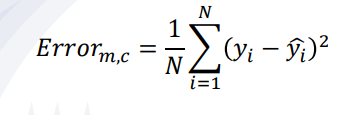

In [189]:
def mean_squared_error(y, y_hat):
    return np.mean((y-y_hat)**2)


Gradient Descent Function

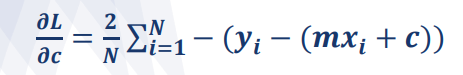

In [190]:
def gradient_descent(x, y, m, c, L):
    N = len(y)
    y_hat = m*x + c
    dm = (-2/N) * np.sum(x * (y - y_hat))
    dc = (-2/N) * np.sum(y - y_hat)
    m -= L * dm
    c -= L * dc
    return m, c

Providing values for slope and y-intercept


In [191]:
m, c = np.random.rand(), np.random.rand()
L = 0.01
epochs = 10

Training model

In [192]:
for epoch in range(epochs):
    y_hat = m*x + c
    mse = mean_squared_error(y, y_hat)
    print(f"Epoch {epoch + 1}: Mean Squared Error = {mse}, m = {m}, c = {c}")
    m, c = gradient_descent(x,y,m,c,L)


Epoch 1: Mean Squared Error = 0.0652200596487598, m = 0.7155241598256477, c = 0.42815912327286487
Epoch 2: Mean Squared Error = 0.06299105094097208, m = 0.7130230353923953, c = 0.42411561395620745
Epoch 3: Mean Squared Error = 0.060884744361059194, m = 0.7105938843700043, c = 0.4201836397941625
Epoch 4: Mean Squared Error = 0.05889438292211847, m = 0.7082346947483027, c = 0.41636008765558596
Epoch 5: Mean Squared Error = 0.05701358173759214, m = 0.7059435107035364, c = 0.41264193134015276
Epoch 6: Mean Squared Error = 0.055236307530072117, m = 0.7037184310293952, c = 0.40902622915086845
Epoch 7: Mean Squared Error = 0.05355685926853412, m = 0.7015576076118514, c = 0.40551012153436683
Epoch 8: Mean Squared Error = 0.05196984987186059, m = 0.6994592439465883, c = 0.402090828787101
Epoch 9: Mean Squared Error = 0.05047018891993211, m = 0.6974215936978283, c = 0.39876564882558746
Epoch 10: Mean Squared Error = 0.04905306631680164, m = 0.6954429592974047, c = 0.3955319550189147


Plotting the final line of best fit

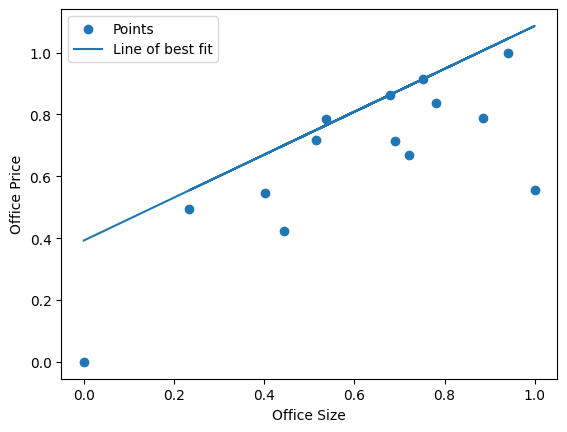

In [193]:
plt.scatter(x, y,label = "Points")
plt.plot(x, m*x + c, label = "Line of best fit")
plt.xlabel("Office Size")
plt.ylabel("Office Price")
plt.legend()
plt.show()

Prediction of office price for size = 100 sq ft

In [194]:
size = (100 - df['SIZE'].min()) / (df['SIZE'].max() - df['SIZE'].min()) 
predicted_price = m * size + c
unscaled_predicted_price =  predicted_price * (df['PRICE'].max() - df['PRICE'].min()) + df['PRICE'].min()
print(f"Predicted price of 100 sq ft office is: {round(unscaled_predicted_price, 6)}")

Predicted price of 100 sq ft office is: 143.032737
